In [1]:
import numpy as np
import pandas as pd
import pickle

with open(f"arxiv-abstracts-2021/pickle.pkl", "rb") as f:
    data = pickle.load(f)

In [2]:
# general statistics
number_of_articles = data.shape[0]

In [3]:
# category translation
full_name_translator = {}
full_name_translator["cs"] ="Computer Science"
full_name_translator["cs.AI"] ="Artificial Intelligence"
full_name_translator["cs.AR"] ="Hardware Architecture"
full_name_translator["cs.CC"] ="Computational Complexity"
full_name_translator["cs.CE"] ="Computational Engineering, Finance, and Science"
full_name_translator["cs.CG"] ="Computational Geometry"
full_name_translator["cs.CL"] ="Computation and Language"
full_name_translator["cs.CR"] ="Cryptography and Security"
full_name_translator["cs.CV"] ="Computer Vision and Pattern Recognition"
full_name_translator["cs.CY"] ="Computers and Society"
full_name_translator["cs.DB"] ="Databases"
full_name_translator["cs.DC"] ="Distributed, Parallel, and Cluster Computing"
full_name_translator["cs.DL"] ="Digital Libraries"
full_name_translator["cs.DM"] ="Discrete Mathematics"
full_name_translator["cs.DS"] ="Data Structures and Algorithms"
full_name_translator["cs.ET"] ="Emerging Technologies"
full_name_translator["cs.FL"] ="Formal Languages and Automata Theory"
full_name_translator["cs.GL"] ="General Literature"
full_name_translator["cs.GR"] ="Graphics"
full_name_translator["cs.GT"] ="Computer Science and Game Theory"
full_name_translator["cs.HC"] ="Human-Computer Interaction"
full_name_translator["cs.IR"] ="Information Retrieval"
full_name_translator["cs.IT"] ="Information Theory"
full_name_translator["cs.LG"] ="Machine Learning"
full_name_translator["cs.LO"] ="Logic in Computer Science"
full_name_translator["cs.MA"] ="Multiagent Systems"
full_name_translator["cs.MM"] ="Multimedia"
full_name_translator["cs.MS"] ="Mathematical Software"
full_name_translator["cs.NA"] ="Numerical Analysis"
full_name_translator["cs.NE"] ="Neural and Evolutionary Computing"
full_name_translator["cs.NI"] ="Networking and Internet Architecture"
full_name_translator["cs.OH"] ="Other Computer Science"
full_name_translator["cs.OS"] ="Operating Systems"
full_name_translator["cs.PF"] ="Performance"
full_name_translator["cs.PL"] ="Programming Languages"
full_name_translator["cs.RO"] ="Robotics"
full_name_translator["cs.SC"] ="Symbolic Computation"
full_name_translator["cs.SD"] ="Sound"
full_name_translator["cs.SE"] ="Software Engineering"
full_name_translator["cs.SI"] ="Social and Information Networks"
full_name_translator["cs.SY"] ="Systems and Control"

full_name_translator["econ"] = "Economics"
full_name_translator["econ.EM"] = "Econometrics"
full_name_translator["econ.GN"] = "General Economics"
full_name_translator["econ.TH"] = "Theoretical Economics"


full_name_translator["eess"] = "Electrical Engineering and Systems Science"
full_name_translator["eess.AS"] =  "Audio and Speech Processing"
full_name_translator["eess.IV"] =  "Image and Video Processing"
full_name_translator["eess.SP"] =  "Signal Processing"
full_name_translator["eess.SY"] =  "Systems and Control"

full_name_translator["math"] = "Mathematics"
full_name_translator["math.AC"] =  "Commutative Algebra"
full_name_translator["math.AG"] =  "Algebraic Geometry"
full_name_translator["math.AP"] =  "Analysis of PDEs"
full_name_translator["math.AT"] =  "Algebraic Topology"
full_name_translator["math.CA"] =  "Classical Analysis and ODEs"
full_name_translator["math.CO"] =  "Combinatorics"
full_name_translator["math.CT"] =  "Category Theory"
full_name_translator["math.CV"] =  "Complex Variables"
full_name_translator["math.DG"] =  "Differential Geometry"
full_name_translator["math.DS"] =  "Dynamical Systems"
full_name_translator["math.FA"] =  "Functional Analysis"
full_name_translator["math.GM"] =  "General Mathematics"
full_name_translator["math.GN"] =  "General Topology"
full_name_translator["math.GR"] =  "Group Theory"
full_name_translator["math.GT"] =  "Geometric Topology"
full_name_translator["math.HO"] =  "History and Overview"
full_name_translator["math.IT"] =  "Information Theory"
full_name_translator["math.KT"] =  "K-Theory and Homology"
full_name_translator["math.LO"] =  "Logic"
full_name_translator["math.MG"] =  "Metric Geometry"
full_name_translator["math.MP"] =  "Mathematical Physics"
full_name_translator["math.NA"] =  "Numerical Analysis"
full_name_translator["math.NT"] =  "Number Theory"
full_name_translator["math.OA"] =  "Operator Algebras"
full_name_translator["math.OC"] =  "Optimization and Control"
full_name_translator["math.PR"] =  "Probability"
full_name_translator["math.QA"] =  "Quantum Algebra"
full_name_translator["math.RA"] =  "Rings and Algebras"
full_name_translator["math.RT"] =  "Representation Theory"
full_name_translator["math.SG"] =  "Symplectic Geometry"
full_name_translator["math.SP"] =  "Spectral Theory"
full_name_translator["math.ST"] =  "Statistics Theory"

full_name_translator["astro-ph"] = "Astrophysics"
full_name_translator["astro-ph.CO"] =  "Cosmology and Nongalactic Astrophysics"
full_name_translator["astro-ph.EP"] =  "Earth and Planetary Astrophysics"
full_name_translator["astro-ph.GA"] =  "Astrophysics of Galaxies"
full_name_translator["astro-ph.HE"] =  "High Energy Astrophysical Phenomena"
full_name_translator["astro-ph.IM"] =  "Instrumentation and Methods for Astrophysics"
full_name_translator["astro-ph.SR"] =  "Solar and Stellar Astrophysics"

full_name_translator["cond-mat"] = "Condensed Matter"
full_name_translator["cond-mat.dis-nn"]="Disordered Systems and Neural Networks"
full_name_translator["cond-mat.mes-hall"]="Mesoscale and Nanoscale Physics"
full_name_translator["cond-mat.mtrl-sci"]="Materials Science"
full_name_translator["cond-mat.other"] = "Other Condensed Matter"
full_name_translator["cond-mat.quant-gas"] = "Quantum Gases"
full_name_translator["cond-mat.soft"] = "Soft Condensed Matter"
full_name_translator["cond-mat.stat-mech"] = "Statistical Mechanics"
full_name_translator["cond-mat.str-el"] = "Strongly Correlated Electrons"
full_name_translator["cond-mat.supr-con"] = "Superconductivity"

full_name_translator["gr-qc"] = "General Relativity and Quantum Cosmology"
full_name_translator["hep-ex"] = "High Energy Physics - Experiment"
full_name_translator["hep-lat"] = "High Energy Physics - Lattice"
full_name_translator["hep-ph"] = "High Energy Physics - Phenomenology"
full_name_translator["hep-th"] = "High Energy Physics - Theory"
full_name_translator["math-ph"] = "Mathematical Physics"


full_name_translator["nlin"] = "Nonlinear Sciences"
full_name_translator["nlin.AO"] = "Adaptation and Self-Organizing Systems"
full_name_translator["nlin.CD"] = "Chaotic Dynamics"
full_name_translator["nlin.CG"] = "Cellular Automata and Lattice Gases"
full_name_translator["nlin.PS"] = "Pattern Formation and Solitons"
full_name_translator["nlin.SI"] = "Exactly Solvable and Integrable Systems"

full_name_translator["nucl-ex"] = "Nuclear Experiment"
full_name_translator["nucl-th"] = "Nuclear Theory"


full_name_translator["physics"] = "Physics"
full_name_translator["physics.acc-ph"] = "Accelerator Physics"
full_name_translator["physics.ao-ph"] = "Atmospheric and Oceanic Physics"
full_name_translator["physics.app-ph"] = "Applied Physics"
full_name_translator["physics.atm-clus"] = "Atomic and Molecular Clusters"
full_name_translator["physics.atom-ph"] = "Atomic Physics"
full_name_translator["physics.bio-ph"] = "Biological Physics"
full_name_translator["physics.chem-ph"] = "Chemical Physics"
full_name_translator["physics.class-ph"] = "Classical Physics"
full_name_translator["physics.comp-ph"] = "Computational Physics"
full_name_translator["physics.data-an"] = "Data Analysis, Statistics and Probability"
full_name_translator["physics.ed-ph"] = "Physics Education"
full_name_translator["physics.flu-dyn"] = "Fluid Dynamics"
full_name_translator["physics.gen-ph"] = "General Physics"
full_name_translator["physics.geo-ph"] = "Geophysics"
full_name_translator["physics.hist-ph"] = "History and Philosophy of Physics"
full_name_translator["physics.ins-det"] = "Instrumentation and Detectors"
full_name_translator["physics.med-ph"] = "Medical Physics"
full_name_translator["physics.optics"] = "Optics"
full_name_translator["physics.plasm-ph"] = "Plasma Physics"
full_name_translator["physics.pop-ph"] = "Popular Physics"
full_name_translator["physics.soc-ph"] = "Physics and Society"
full_name_translator["physics.space-ph"] = "Space Physics"

full_name_translator["quant-ph"] = "Quantum Physics"

full_name_translator["q-bio"] = "Quantitative Biology"
full_name_translator["q-bio.BM"] = "Biomolecules"
full_name_translator["q-bio.CB"] = "Cell Behavior"
full_name_translator["q-bio.GN"] = "Genomics"
full_name_translator["q-bio.MN"] = "Molecular Networks"
full_name_translator["q-bio.NC"] = "Neurons and Cognition"
full_name_translator["q-bio.OT"] = "Other Quantitative Biology"
full_name_translator["q-bio.PE"] = "Populations and Evolution"
full_name_translator["q-bio.QM"] = "Quantitative Methods"
full_name_translator["q-bio.SC"] = "Subcellular Processes"
full_name_translator["q-bio.TO"] = "Tissues and Organs"


full_name_translator["q-fin"] = "Quantitative Finance"
full_name_translator["q-fin.CP"] = "Computational Finance"
full_name_translator["q-fin.EC"] = "Economics"
full_name_translator["q-fin.GN"] = "General Finance"
full_name_translator["q-fin.MF"] = "Mathematical Finance"
full_name_translator["q-fin.PM"] = "Portfolio Management"
full_name_translator["q-fin.PR"] = "Pricing of Securities"
full_name_translator["q-fin.RM"] = "Risk Management"
full_name_translator["q-fin.ST"] = "Statistical Finance"
full_name_translator["q-fin.TR"] = "Trading and Market Microstructure"

full_name_translator["stat"] = "Statistics"
full_name_translator["stat.AP"] = "Applications"
full_name_translator["stat.CO"] = "Computation"
full_name_translator["stat.ME"] = "Methodology"
full_name_translator["stat.ML"] = "Machine Learning"
full_name_translator["stat.OT"] = "Other Statistics"
full_name_translator["stat.TH"] = "Statistics Theory"

In [4]:
# old labels
alias_map = {}
alias_map["acc-phys"] = "physics.acc-ph"
alias_map["adap-org"]= "nlin.AO"
alias_map["chao-dyn"]= "nlin.CD"
alias_map["patt-sol"]= "nlin.PS"
alias_map["dg-ga"]= "math.DG"
alias_map["solv-int"]= "nlin.SI"
alias_map["bayes-an"]= "physics.data-an"
alias_map["comp-gas"]= "nlin.CG"
alias_map["alg-geom"]= "math.AG"
alias_map["funct-an"]= "math.FA"
alias_map["q-alg"]= "math.QA"
alias_map["ao-sci"]= "physics.ao-ph"
alias_map["atom-ph"]= "physics.atom-ph"
alias_map["chem-ph"]= "physics.chem-ph"
alias_map["plasm-ph"]= "physics.plasm-ph"
alias_map["mtrl-th"]= "cond-mat.mtrl-sci"
alias_map["cmp-lg"]= "cs.CL"
alias_map["supr-con"]= "cond-mat.supr-con"

In [5]:
def to_full_name(key:str)->str:
    return full_name_translator.get(alias_map.get(key,key))

In [6]:
import tqdm
label_lists = []
for _, article in tqdm.tqdm(data.iterrows()):
    category_labels = article["categories"][0].split(" ")
    final_category_labels = [alias_map.get(cat_lab, cat_lab) for cat_lab in category_labels]
    label_lists.append(final_category_labels)


1999486it [02:14, 14864.41it/s]


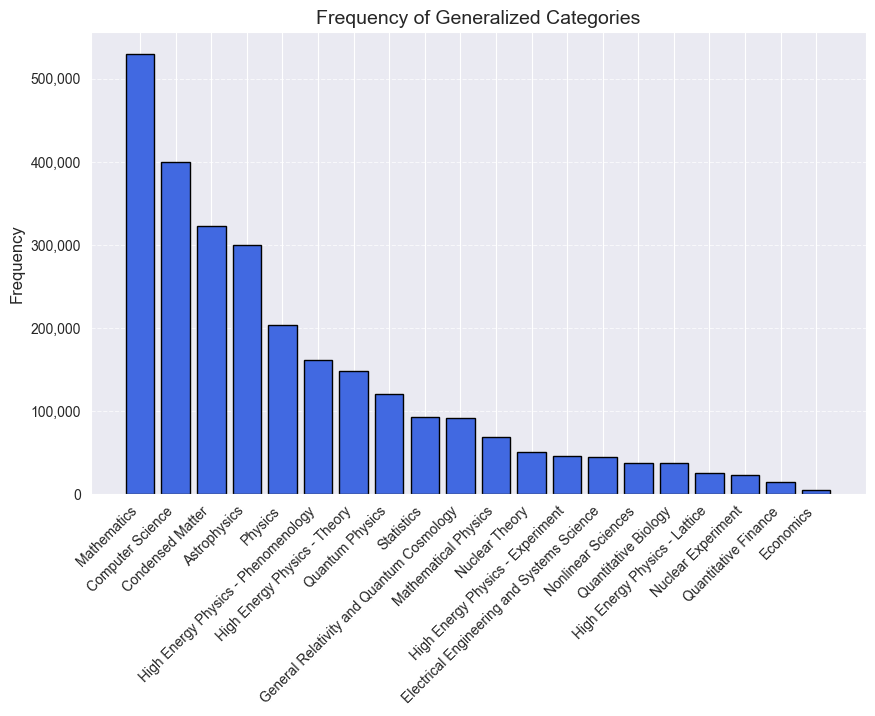

In [92]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import matplotlib.ticker as mticker

# Flatten the list of lists
all_general_labels = []
for article_labels in label_lists:
    general_article_labels = set()
    general_article_labels.update([label.split(".")[0] for label in article_labels])
    all_general_labels.append(list(general_article_labels))

all_general_labels_flat = list(itertools.chain.from_iterable(all_general_labels))


# Count occurrences of each label
label_counts = Counter(all_general_labels_flat)

# Sort labels by frequency
labels, counts = zip(*label_counts.most_common())
full_labels = [to_full_name(label) for label in labels]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(full_labels, counts, color='royalblue', edgecolor='black')

# Improve aesthetics
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Generalized Categories", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis labels with thousands separator
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/histogram_general_categories.png", dpi=300, bbox_inches='tight')  # Save as high-quality PNG
plt.show()

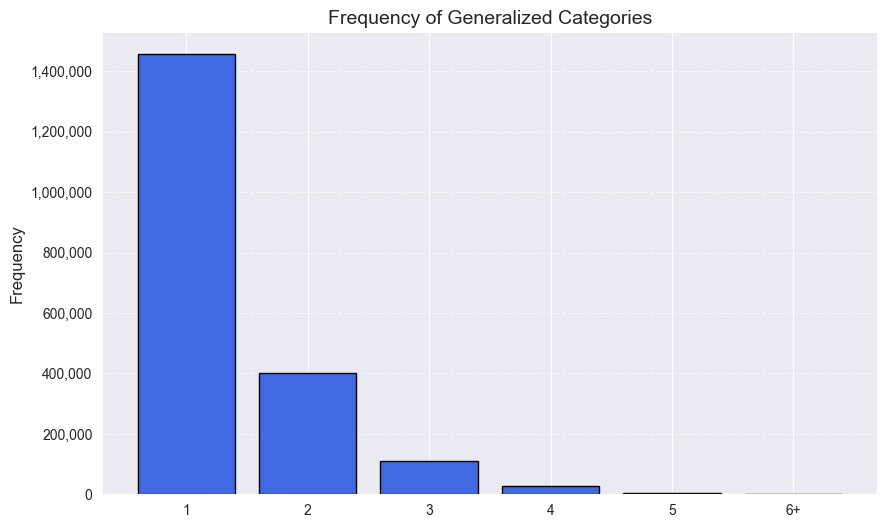

In [94]:
# histogram of multilabel size
general_lables_len = [len(general_label_list) for general_label_list in all_general_labels]

labels_len_counts = Counter(general_lables_len)

# Sort labels by frequency
lenghts, counts = zip(*labels_len_counts.most_common())

# summarize everything after the 5th label
lenghts = [str(len_num) for len_num in lenghts[:6]]
lenghts[5]="6+"
counts = list(counts[:6])
counts[5] = sum(counts[5:])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(lenghts, counts, color='royalblue', edgecolor='black')

# Improve aesthetics
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Generalized Categories", fontsize=14)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis labels with thousands separator
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/histogram_general_categories_len.png", dpi=300, bbox_inches='tight')  # Save as high-quality PNG
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# Determine all unique categories
all_labels = labels

# Create a DataFrame where each row corresponds to an article,
# and each column is True/False for the presence of a category.
data = [{label: (label in labels) for label in all_labels} for labels in all_general_labels]
data = [datapoint for datapoint in data if any(datapoint.values())]

df = pd.DataFrame(data)
df.columns = [to_full_name(col_name) for col_name in df.columns]

# Convert the DataFrame into a Series with a MultiIndex as required by upsetplot
data_for_upset = from_indicators(df.columns, df)


In [96]:
# Create the UpSet plot, which will show the counts of articles for each intersection of categories
upset = UpSet(data_for_upset,
              min_degree=2,
              sort_by="cardinality")

In [ ]:
max_k = 20
# filter intersections
upset.totals = upset.totals[:max_k]
upset.intersections = upset.intersections[:max_k]
# remove empty columns
cols_to_remove = []
for col in range(len(upset.intersections.index[0])):
    if not any([upset.intersections.index[row][col] for row in range(len(upset.intersections))]):
        cols_to_remove.append(col)

for col_to_remove in cols_to_remove[::-1]:
    name = upset.intersections.index.names[col_to_remove]
    print(name)
    upset.intersections = upset.intersections.droplevel(name)

In [100]:
for col_to_remove in cols_to_remove[::-1]:
    name = upset.totals.index[col_to_remove]
    print(name)
    upset.totals = upset.totals.drop(name)

Economics
Quantitative Finance
Nuclear Experiment
High Energy Physics - Lattice
Quantitative Biology
Nonlinear Sciences


C:\bachelor\article-clustering\venv\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\bachelor\article-clustering\venv\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

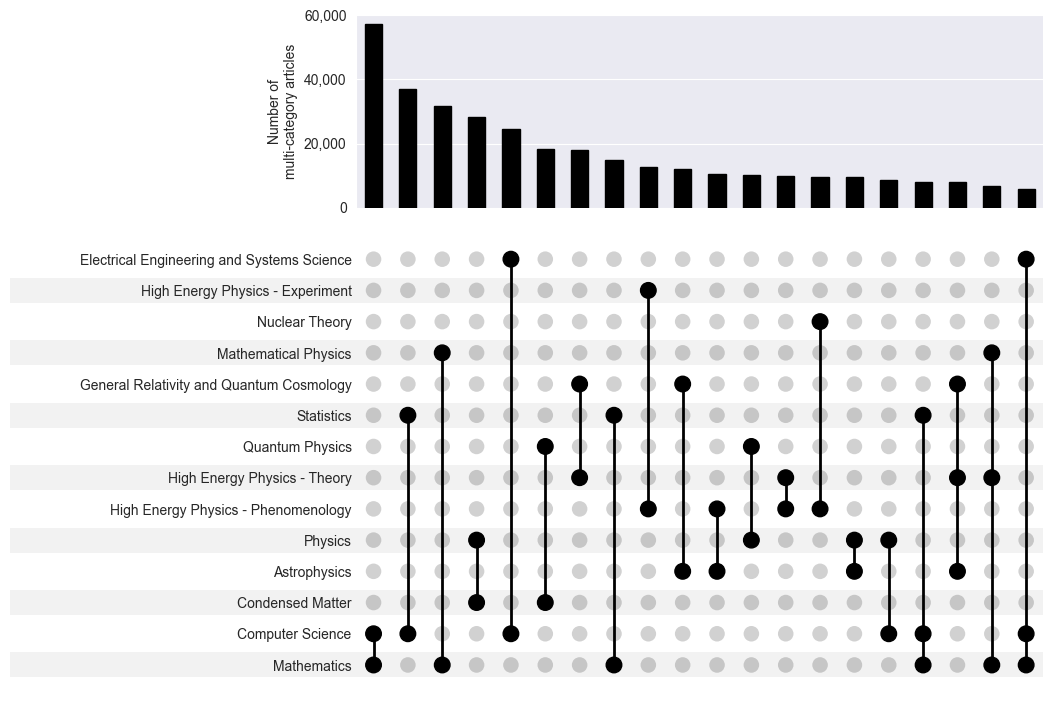

In [101]:

axes = upset.plot()

# Hide the side histogram (the set size axis) if it exists in the returned axes dictionary.

axes["totals"].remove()
axes["intersections"].set_ylabel("Number of\nmulti-category articles")
axes["intersections"].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.savefig("plots/upset_general_categories.png", dpi=300, bbox_inches='tight')
plt.show()


Number of unique labels: 158


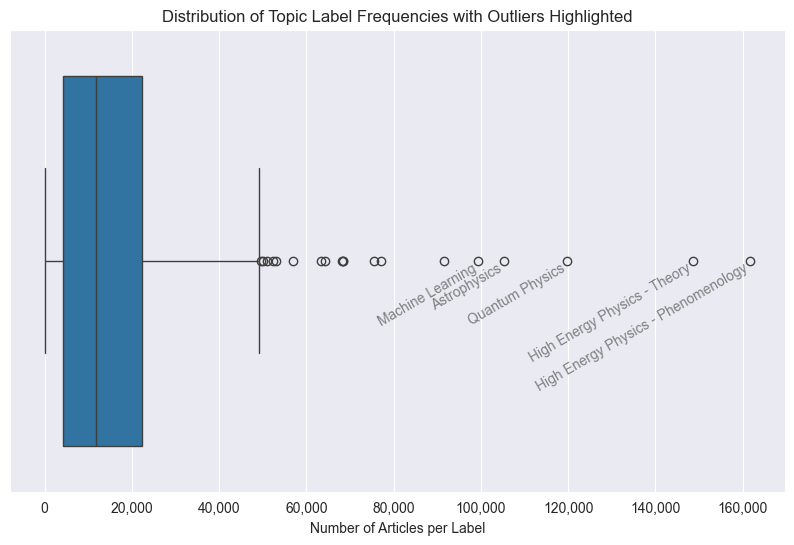

In [108]:
import seaborn as sns

all_specific_labels_flat = list(itertools.chain.from_iterable(label_lists))
num_unique_labels = len(set(all_specific_labels_flat))
print("Number of unique labels:", num_unique_labels)

# Count occurrences of each label
label_counts = Counter(all_specific_labels_flat)

# Sort labels by frequency
labels, counts = zip(*label_counts.most_common())
full_labels = [to_full_name(label) for label in labels]

counts_array = np.array(counts)

# Compute quartiles and interquartile range (IQR)
q1 = np.percentile(counts_array, 25)
q3 = np.percentile(counts_array, 75)
iqr = q3 - q1

# Define outlier threshold (1.5 * IQR above Q3)
upper_whisker = q3 + 1.5 * iqr

# Identify outliers
outlier_indices = np.where(counts_array > upper_whisker)[0]

# Get the top-K outliers (sorted by highest count)
K = 5  # Change this number to adjust how many outliers you want to label
sorted_outliers = sorted(outlier_indices, key=lambda i: counts_array[i], reverse=True)[:K]

# Create the horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=counts, orient="h")

# Annotate top-K outliers with angled text
for i in sorted_outliers:
    plt.text(counts[i], 0, full_labels[i], ha='right', va='top', fontsize=10, color='gray', rotation=30)

# Add title and labels
plt.title("Distribution of Topic Label Frequencies with Outliers Highlighted")
plt.xlabel("Number of Articles per Label")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/boxplot_subcategories_count.png", dpi=300, bbox_inches='tight')  # Save as high-quality PNG
# Show the plot
plt.show()

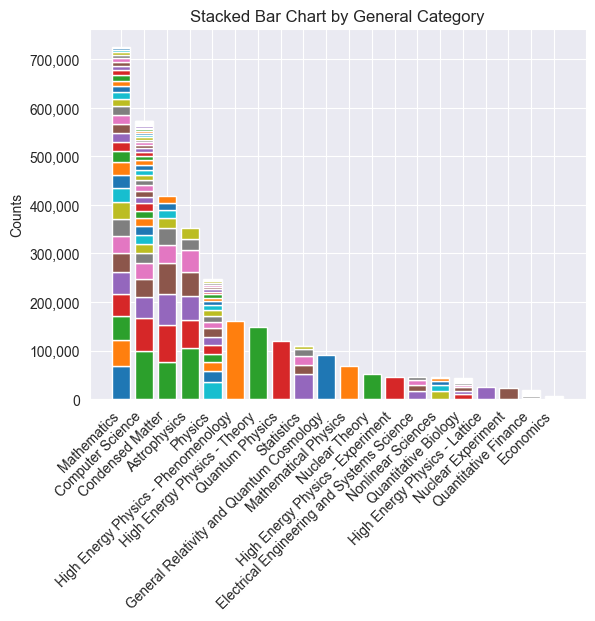

In [109]:
from collections import defaultdict

# make a stacked bar chart
general_labels = list(set([label.split(".")[0] for label in labels]))
num_general_labels = len(set(general_labels))


grouped_data = defaultdict(list)
for sub, count in label_counts.items():
    gen_cat = sub.split(".")[0]
    grouped_data[gen_cat].append((sub, count))

for gen_cat in grouped_data:
    grouped_data[gen_cat].sort(key=lambda x: x[1], reverse=True)

cumulative_counts = {gen_cat: sum(count for _, count in items) for gen_cat, items in grouped_data.items()}

# Sort general categories by cumulative count in descending order.
general_categories = sorted(grouped_data.keys(), key=lambda x: cumulative_counts[x], reverse=True)
fig, ax = plt.subplots()

# Plot each general category as a bar, stacking the subcategory counts
for idx, gen_cat in enumerate(general_categories):
    bottom = 0  # starting point of the stack
    for sub, count in grouped_data[gen_cat]:
        # Only label the first subcategory to avoid duplicate legend entries
        ax.bar(idx, count, bottom=bottom, label=sub if bottom == 0 else "")
        bottom += count

# Configure the x-axis to show the general category names
ax.set_xticks(range(len(general_categories)))
ax.set_xticklabels([to_full_name(lab) for lab in general_categories])
ax.set_ylabel("Counts")
ax.set_title("Stacked Bar Chart by General Category")
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/stacked_barchart_subcategories.png", dpi=300, bbox_inches='tight')
plt.show()

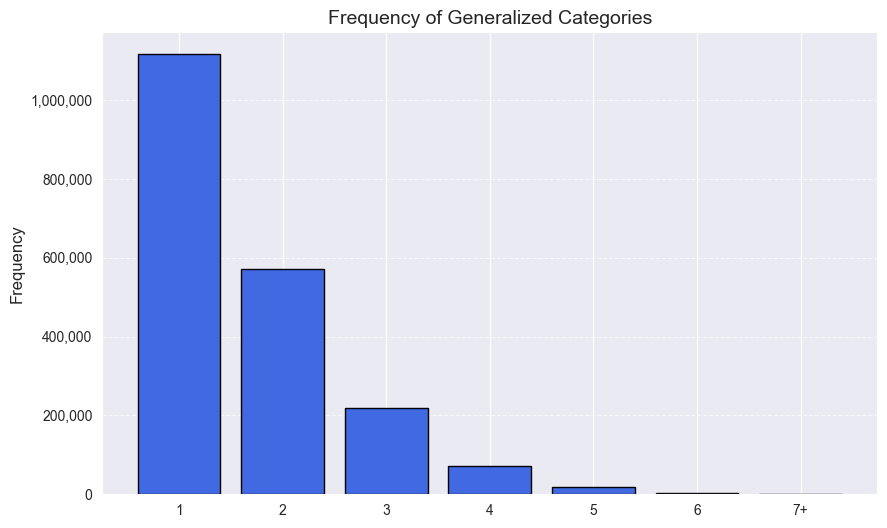

In [110]:
# histogram of num of labels per article
num_of_labels_per_article = [len(labs) for labs in label_lists]

labels_len_counts = Counter(num_of_labels_per_article)

# Sort labels by frequency
lenghts, counts = zip(*labels_len_counts.most_common())

k=6
# summarize everything after the 5th label
lenghts = [str(len_num) for len_num in lenghts[:k+1]]
lenghts[k]=f"{str(k+1)}+"
counts = list(counts[:k+1])
counts[k] = sum(counts[k:])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(lenghts, counts, color='royalblue', edgecolor='black')

# Improve aesthetics
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Generalized Categories", fontsize=14)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis labels with thousands separator
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/histogram_subcategories_len.png", dpi=300, bbox_inches='tight')  # Save as high-quality PNG
plt.show()

In [124]:
# Determine all unique categories
all_labels = list(set(itertools.chain.from_iterable(label_lists)))
#all_labels = ["cs.NA", "math.ST", "stat.TH","astro-ph.EP", "math.NA", "cond-mat.soft", "cs.IT", "math.IT", "cond-mat.supr-con", "hep-ex", "astro-ph.SR", "astro-ph.GA", "nucl-th", "stat.ML", "astro-ph.CO", "cond-mat.str-el", "cond-mat.stat-mech", "cs.CV", "math.MP", "math-ph", "cond-mat.mtrl-sci", "cond-mat.mes-hall", "gr-qc", "cs.LG", "quant-ph", "hep-th", "hep-ph"]

# Create a DataFrame where each row corresponds to an article,
# and each column is True/False for the presence of a category.
data = [{to_full_name(label): (label in labels) for label in all_labels} for labels in label_lists]
#data = [datapoint for datapoint in data if any(datapoint.values())]

df = pd.DataFrame(data)

In [112]:
del all_general_labels
del all_general_labels_flat
del all_specific_labels_flat
del general_lables_len
del grouped_data

In [126]:

# Convert the DataFrame into a Series with a MultiIndex as required by upsetplot
data_for_upset = from_indicators(df.columns, df)

In [127]:
# Create the UpSet plot, which will show the counts of articles for each intersection of categories
upset = UpSet(data_for_upset,
              min_subset_size=4000,
              min_degree=2,
              sort_by="cardinality")

In [90]:
len(upset.intersections.index[1])

27

In [128]:

max_k=20
# filter intersections
upset.intersections = upset.intersections[:max_k]
# remove empty columns
cols_to_remove = []
for col in range(len(upset.intersections.index[0])):
    if not any([upset.intersections.index[row][col] for row in range(len(upset.intersections))]):
        cols_to_remove.append(col)


In [129]:
for col_to_remove in cols_to_remove[::-1]:
    name= upset.intersections.index.names[col_to_remove]
    print(name)
    upset.intersections = upset.intersections.droplevel(name)

General Literature
Operating Systems
Other Statistics
Other Quantitative Biology
Theoretical Economics
Cellular Automata and Lattice Gases
Quantitative Biology
Trading and Market Microstructure
Portfolio Management
Subcellular Processes
Pricing of Securities
Computational Finance
Risk Management
Mathematical Software
Tissues and Organs
Mathematical Finance
Cell Behavior
Symbolic Computation
Other Computer Science
Popular Physics
Econometrics
General Economics
General Finance
Atomic and Molecular Clusters
Genomics
Economics
Emerging Technologies
Hardware Architecture
Statistical Finance
Performance
History and Overview
Physics Education
Molecular Networks
General Mathematics
Graphics
Multimedia
Formal Languages and Automata Theory
Digital Libraries
History and Philosophy of Physics
General Topology
Biomolecules
Computational Engineering, Finance, and Science
Multiagent Systems
Atmospheric and Oceanic Physics
Space Physics
Medical Physics
K-Theory and Homology
Geophysics
Computational Ge

In [130]:
for col_to_remove in cols_to_remove[::-1]:
    name = upset.totals.index[col_to_remove]
    print(name)
    upset.totals = upset.totals.drop(name)

General Literature
Operating Systems
Other Statistics
Other Quantitative Biology
Theoretical Economics
Cellular Automata and Lattice Gases
Quantitative Biology
Trading and Market Microstructure
Portfolio Management
Subcellular Processes
Pricing of Securities
Computational Finance
Risk Management
Mathematical Software
Tissues and Organs
Mathematical Finance
Cell Behavior
Symbolic Computation
Other Computer Science
Popular Physics
Econometrics
General Economics
General Finance
Atomic and Molecular Clusters
Genomics
Economics
Emerging Technologies
Hardware Architecture
Statistical Finance
Performance
History and Overview
Physics Education
Molecular Networks
General Mathematics
Graphics
Multimedia
Formal Languages and Automata Theory
Digital Libraries
History and Philosophy of Physics
General Topology
Biomolecules
Computational Engineering, Finance, and Science
Multiagent Systems
Atmospheric and Oceanic Physics
Space Physics
Medical Physics
K-Theory and Homology
Geophysics
Computational Ge

C:\bachelor\article-clustering\venv\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\bachelor\article-clustering\venv\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

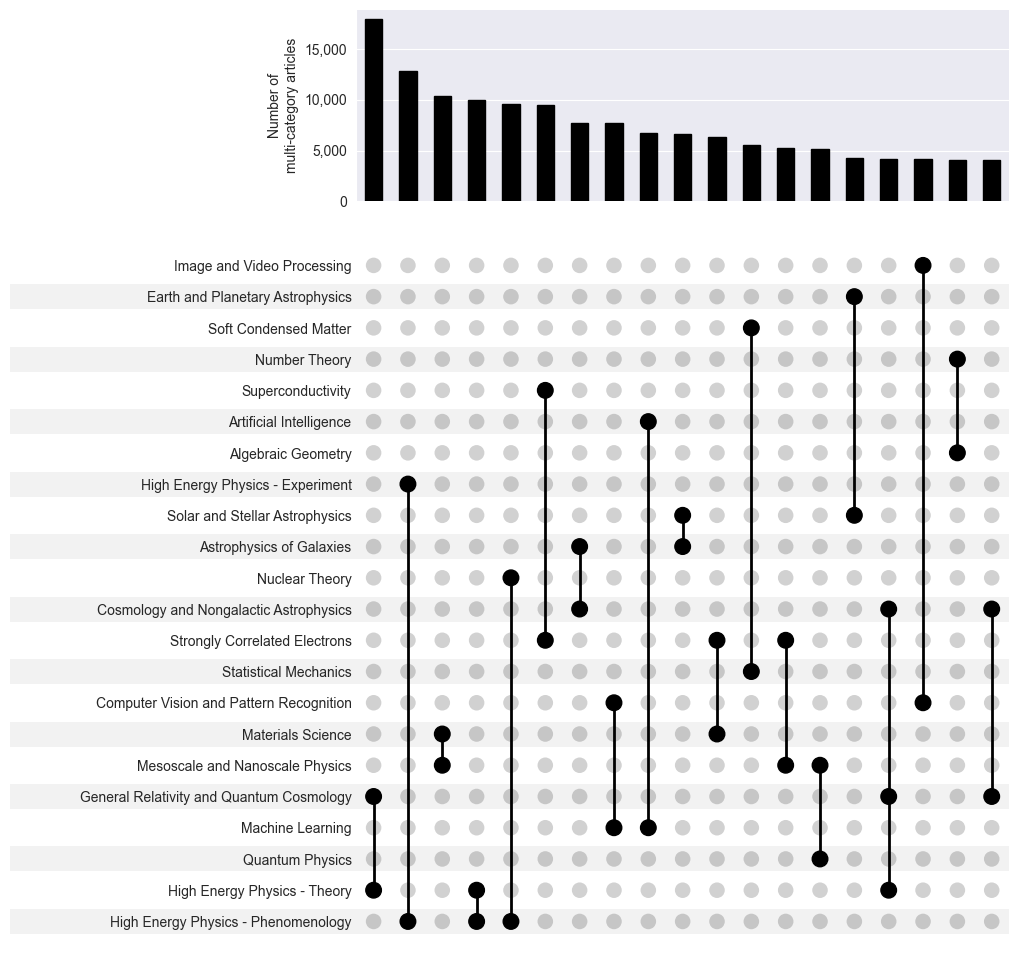

In [131]:
axes = upset.plot()

# Hide the side histogram (the set size axis) if it exists in the returned axes dictionary.

axes["totals"].remove()
axes["intersections"].set_ylabel("Number of\nmulti-category articles")
axes["intersections"].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("plots/upset_subcategories.png", dpi=300, bbox_inches='tight')
plt.show()